# Price Prediction Project

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Data Analysis

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [8]:
df = df.loc[df['view'] == 'NONE']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19422 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19422 non-null  int64  
 1   date           19422 non-null  object 
 2   price          19422 non-null  float64
 3   bedrooms       19422 non-null  int64  
 4   bathrooms      19422 non-null  float64
 5   sqft_living    19422 non-null  int64  
 6   sqft_lot       19422 non-null  int64  
 7   floors         19422 non-null  float64
 8   waterfront     17312 non-null  object 
 9   view           19422 non-null  object 
 10  condition      19422 non-null  object 
 11  grade          19422 non-null  object 
 12  sqft_above     19422 non-null  int64  
 13  sqft_basement  19422 non-null  object 
 14  yr_built       19422 non-null  int64  
 15  yr_renovated   15972 non-null  float64
 16  zipcode        19422 non-null  int64  
 17  lat            19422 non-null  float64
 18  long  

In [10]:
df = df.drop(columns = ['yr_renovated', 'id', 'date', 'floors', 'view', 'lat', 'long', 'waterfront'])

<AxesSubplot:>

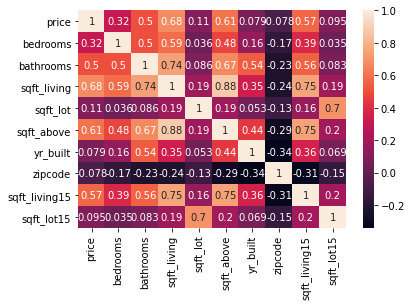

In [11]:
df.corr()
sns.heatmap(df.corr(), annot = True)

In [12]:
df['grade_clean'] = df['grade'].str[:2].astype(int)

In [13]:
grade_group = []
for grade in df['grade_clean']:
    if grade >= 10:
        grade_group.append(2)
    elif grade <= 6:
        grade_group.append(0)
    else:
        grade_group.append(1)


In [14]:
df['grade_group'] = grade_group

In [15]:
df = df.drop(columns = 'grade')

In [16]:
df['sqft_basement_comp'] = df['sqft_living'] - df['sqft_above']

In [17]:
df[['sqft_basement_comp', 'sqft_basement']].loc[df['sqft_basement'] != '0.0'].head(20)

,sqft_basement_comp,sqft_basement
1,400,400.0
3,910,910.0
5,1530,1530.0
6,0,?
8,730,730.0
10,1700,1700.0
11,300,300.0
18,0,?
20,760,760.0
26,700,700.0


In [18]:
df['has_basement'] = df['sqft_basement_comp'] > 0

In [19]:
df['has_basement']

0        False
1         True
2        False
3         True
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: has_basement, Length: 19422, dtype: bool

In [20]:
df = df.drop(columns = 'sqft_basement')

In [21]:
X = df.drop(columns='price')
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [22]:
train_df = X_train.copy()
train_df['price'] = y_train

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [24]:
X_train.isna().sum()

bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
condition             0
sqft_above            0
yr_built              0
zipcode               0
sqft_living15         0
sqft_lot15            0
grade_clean           0
grade_group           0
sqft_basement_comp    0
has_basement          0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19422 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               19422 non-null  float64
 1   bedrooms            19422 non-null  int64  
 2   bathrooms           19422 non-null  float64
 3   sqft_living         19422 non-null  int64  
 4   sqft_lot            19422 non-null  int64  
 5   condition           19422 non-null  object 
 6   sqft_above          19422 non-null  int64  
 7   yr_built            19422 non-null  int64  
 8   zipcode             19422 non-null  int64  
 9   sqft_living15       19422 non-null  int64  
 10  sqft_lot15          19422 non-null  int64  
 11  grade_clean         19422 non-null  int32  
 12  grade_group         19422 non-null  int64  
 13  sqft_basement_comp  19422 non-null  int64  
 14  has_basement        19422 non-null  bool   
dtypes: bool(1), float64(2), int32(1), int64(10), object(1

In [27]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,grade_clean,grade_group,sqft_basement_comp,has_basement
12510,4,2.50,2040,8265,Average,2040,1996,98146,2160,8265,7,1,0,False
6093,3,2.50,3160,4270,Average,2650,2006,98011,2720,12523,8,1,510,True
15835,4,2.50,1950,4553,Average,1950,2000,98056,1780,4598,7,1,0,False
14398,2,1.50,1300,2970,Average,990,1903,98102,1700,3000,7,1,310,True
20385,3,2.50,1800,2731,Average,1800,2014,98065,1800,3265,8,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12590,3,1.75,1820,7194,Good,1820,1967,98003,1420,7560,7,1,0,False
13333,3,2.25,1330,8004,Average,1330,1985,98034,1300,7971,7,1,0,False
6019,4,1.50,1850,3600,Average,1660,1929,98112,1970,3600,8,1,190,True
962,4,2.00,1520,6174,Very Good,1520,1920,98022,1390,5407,6,0,0,False


In [28]:
imputer = SimpleImputer(strategy = 'constant', fill_value = 'unknown')

imputer.fit(X_train)

X_train_nonull = imputer.transform(X_train)
X_test_nonull = imputer.transform(X_test)

In [29]:
pd.DataFrame(X_train_nonull)[6].unique()

array([1996, 2006, 2000, 1903, 2014, 1987, 1989, 1966, 2008, 1953, 1920,
       1967, 1955, 1999, 1961, 1968, 2007, 1960, 1971, 1970, 1977, 1959,
       1998, 2003, 1979, 2013, 1918, 2012, 1993, 1943, 1951, 1908, 1991,
       1958, 1957, 1914, 1910, 1975, 1978, 1984, 1964, 1963, 1923, 1994,
       1985, 1919, 1950, 1912, 1928, 1988, 1935, 1905, 1983, 1980, 1941,
       2005, 1926, 1976, 1925, 1969, 1948, 1906, 1997, 1947, 1927, 1924,
       1972, 1949, 2010, 1990, 1915, 1922, 1965, 1974, 1916, 1937, 1904,
       1962, 2004, 1956, 1973, 1942, 2001, 2002, 2011, 2009, 1900, 1939,
       1952, 1981, 1940, 1921, 1902, 1986, 1995, 1992, 1913, 1944, 1929,
       1938, 1945, 1982, 1946, 1954, 1931, 1936, 2015, 1930, 1911, 1907,
       1933, 1909, 1932, 1917, 1901, 1934], dtype=object)

In [31]:
cat_cols = ['zipcode']

encoder = OneHotEncoder(handle_unknown='ignore',
                        categories='auto')

ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough', sparse_threshold=0)

ct.fit(X_train)

X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

In [32]:
X_train_enc.shape

(14566, 87)

In [33]:
pd.DataFrame(X_train_enc, columns=ct.get_feature_names()).head()

,ohe__x0_Average,ohe__x0_Fair,ohe__x0_Good,ohe__x0_Poor,ohe__x0_Very Good,ohe__x1_98001,ohe__x1_98002,ohe__x1_98003,ohe__x1_98004,ohe__x1_98005,...,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,grade_clean,grade_group,sqft_basement_comp,has_basement
0,1,0,0,0,0,0,0,0,0,0,...,2040,8265,2040,1996,2160,8265,7,1,0,False
1,1,0,0,0,0,0,0,0,0,0,...,3160,4270,2650,2006,2720,12523,8,1,510,True
2,1,0,0,0,0,0,0,0,0,0,...,1950,4553,1950,2000,1780,4598,7,1,0,False
3,1,0,0,0,0,0,0,0,0,0,...,1300,2970,990,1903,1700,3000,7,1,310,True
4,1,0,0,0,0,0,0,0,0,0,...,1800,2731,1800,2014,1800,3265,8,1,0,False


In [34]:
scaler = MinMaxScaler()
scaler.fit(X_train_enc)

X_train_sc = scaler.transform(X_train_enc)
X_test_sc = scaler.transform(X_test_enc)

In [ ]:
grade_median = train_df.groupby('grade')['price'].median().sort_values(ascending = False)

In [ ]:
dict(grade_median)

In [ ]:
train_df['grade_median'] = train_df['grade'].apply(lambda g: dict(grade_median).get(g))

In [ ]:
cond_median = train_df.groupby('condition')['price'].median().sort_values(ascending = False)

In [ ]:
dict(cond_median)

In [ ]:
train_df['condition_median'] = train_df['condition'].apply(lambda g: dict(cond_median).get(g))

In [ ]:
df['grade'].value_counts().index

In [ ]:
train_df['valuation'] =(train_df['grade_median'] + train_df['condition_median']) / 2

In [ ]:
train_df['valuation_difference'] = train_df['price'] - train_df['valuation']

In [37]:
train_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,grade_clean,grade_group,sqft_basement_comp,has_basement,price
12510,4,2.5,2040,8265,Average,2040,1996,98146,2160,8265,7,1,0,False,355000.0
6093,3,2.5,3160,4270,Average,2650,2006,98011,2720,12523,8,1,510,True,555000.0
15835,4,2.5,1950,4553,Average,1950,2000,98056,1780,4598,7,1,0,False,322000.0
14398,2,1.5,1300,2970,Average,990,1903,98102,1700,3000,7,1,310,True,550000.0
20385,3,2.5,1800,2731,Average,1800,2014,98065,1800,3265,8,1,0,False,408474.0


In [38]:
def evaluate_model(X_train, X_test, y_train, y_test, log = False):
    '''
    Expected Good Doc String
    '''
    # Create and fit model
    model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
    
    # Print summary (if OLS)
    print(model.summary())
    
    # Grab predictions
    train_preds = model.predict(sm.add_constant(X_train))
    test_preds = model.predict(sm.add_constant(X_test))
    
    # Evaluate on train and test
    print(f"Train R2 Score: {r2_score(y_train, train_preds):.4f}")
    if log == True:
        y_train_unlog = np.exmp1(y_train)
        train_preds_unlog = np.expm1(train_preds)
        print(f"Train MAE Score: ${mean_absolute_error(y_train_unlog, train_preds_unlog):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_train_unlog, train_preds_unlog, squared=False):.4f}")
    else:
        print(f"Train MAE Score: ${mean_absolute_error(y_train, train_preds):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_train, train_preds, squared=False):.4f}")
    print("*"*20)
    print(f"Test R2 Score: {r2_score(y_test, test_preds):.4f}")
    if log == True:
        y_test_unlog = np.expm1(y_test)
        test_preds_unlog = np.expm1(test_preds)
        print(f"Train MAE Score: ${mean_absolute_error(y_test_unlog, test_preds_unlog):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_test_unlog, test_preds_unlog, squared=False):.4f}")
    else:
        print(f"Train MAE Score: ${mean_absolute_error(y_test, test_preds):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_test, test_preds, squared=False):.4f}")
    print("*"*20)
    
    # Visualize residuals
    plt.scatter(train_preds, y_train-train_preds, label='Train')
    plt.scatter(test_preds, y_test-test_preds, label='Test')

    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()
    
    return train_preds, test_preds

In [ ]:
def prediction():
    model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [39]:
X_train_2 = X_train[['grade_group', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]
X_test_2 = X_test[['grade_group', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]

In [47]:
X_train_3 = X_train[['sqft_living']]
X_test_3 = X_test[['sqft_living']]

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaler.fit(X_train_2)

X_train_2_sc = scaler.transform(X_train_2)
X_test_2_sc = scaler.transform(X_test_2)

In [48]:
scaler = StandardScaler()
scaler.fit(X_train_3)

X_train_3_sc = scaler.transform(X_train_3)
X_test_3_sc = scaler.transform(X_test_3)

In [ ]:
evaluate_model(X_train_2_sc, X_test_2_sc, y_train, y_test)

In [ ]:
evaluate_model(X_train_3_sc, X_test_3_sc, y_train, y_test)

In [ ]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [ ]:
evaluate_model(X_train_2_sc, X_test_2_sc, y_train_log, y_test_log)

In [ ]:
evaluate_model(X_train_3_sc, X_test_3_sc, y_train_log, y_test_log)

In [ ]:
model = sm.OLS(labels[:half], data[:half])
predictions = model.predict(data[half:])